In [1]:
from PIL import Image
import numpy as np
im = Image.open("image.png")
(im.format, im.size, im.mode, np.array(im).shape)

('PNG', (500, 500), 'RGBA', (500, 500, 4))

In [26]:
np.asarray(im)[np.where(np.asarray(im))]

array([ 52, 155,  60, ..., 247, 231,  52], dtype=uint8)

In [2]:
threshold = 150
src = np.array(im)[:, :, 3] < 150

In [65]:
%%time
pixels = np.array(np.where(1 - src))
I = np.arange(500).reshape(-1,1,1)
J = np.arange(500).reshape(1,-1,1)

dist = np.ones((500,500)) * 1000
for k in range(10):
    print(k)
    i, j = pixels[:, k::10].reshape(2, 1, 1, -1)
    dist = np.minimum(dist, np.min(np.sqrt((I - i)**2 + (J - j)**2), axis = -1))

0
1
2
3
4
5
6
7
8
9
CPU times: user 21.3 s, sys: 21.7 s, total: 42.9 s
Wall time: 48.4 s


In [3]:
%%time
pixels = np.array(np.where(1 - src))[:, :]
I = np.arange(500).reshape(-1,1,1)
J = np.arange(500).reshape(1,-1,1)

groups = 10

def compute(k):
    i, j = pixels[:, k::groups].reshape(2, 1, 1, -1)
    dist = np.min(np.sqrt((I - i)**2 + (J - j)**2), axis = -1, initial = 1000)
    print(k)
    return dist

import multiprocessing as mpl
with mpl.Pool(4) as p:
    dist = np.min(p.map(compute, range(groups), chunksize = 1), axis = 0)
dist

1
0
2
3
4
5
7
6
8
9
CPU times: user 235 ms, sys: 255 ms, total: 490 ms
Wall time: 3min 38s


array([[112.48555463, 111.75866857, 111.03603019, ..., 156.77372229,
        157.62296787, 158.47397263],
       [111.80339887, 111.07204869, 110.34491379, ..., 156.24659996,
        157.09869509, 157.95252451],
       [111.12605455, 110.39021696, 109.658561  , ..., 155.72411502,
        156.57905352, 157.43570116],
       ...,
       [105.42295765, 104.63746939, 103.85566908, ..., 187.52333188,
        188.36666372, 189.21152185],
       [106.04244433, 105.26157894, 104.4844486 , ..., 188.06381896,
        188.9047379 , 189.74720024],
       [106.66770833, 105.89145386, 105.11898021, ..., 188.60805921,
        189.44656239, 190.28662591]])

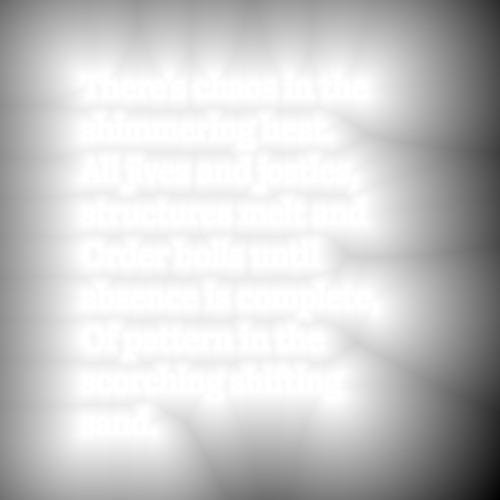

In [4]:
quantised = 255 - (dist / np.max(dist) * 255).astype(np.uint8)
#quantised = (quantised % 2) * 255
im2 = Image.fromarray(quantised, mode = 'L')
im2 = im2.convert("RGBA")
im2.save('distfield.png')
im2

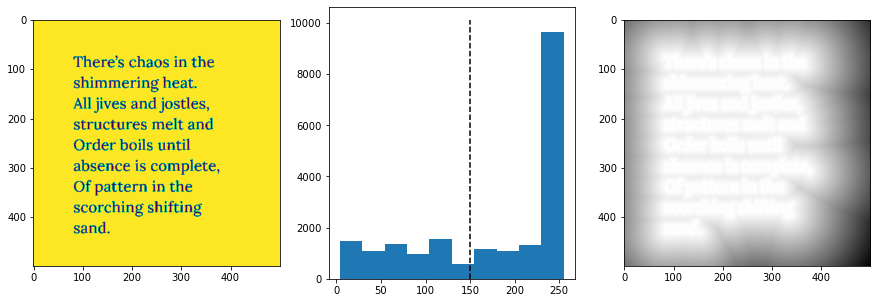

In [6]:
from matplotlib import pyplot as plt
f, axes = plt.subplots(ncols = 3, figsize = (15,5))
axes[0].imshow(src)
axes[2].imshow(im2)
vals = np.array(im)[:, :, 3].flatten()
axes[1].hist(vals[vals > 1]);
axes[1].vlines(threshold, *axes[1].get_ylim(), linestyle = '--')